In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten

In [ ]:
df=pd.read_csv("/content/Admission_Predict_Ver1.1.csv")
df.head()


,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [ ]:
df.shape

(500, 9)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [ ]:
df.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [ ]:
df.isnull().sum().sum()

0

In [ ]:
df.drop('Serial No.', axis =1 , inplace = True)

In [ ]:
df.head(2)

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76


In [ ]:
x = df.iloc[:, :-1]
y = df.iloc[:,-1]

In [ ]:
x

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337,118,4,4.5,4.5,9.65,1
1,324,107,4,4.0,4.5,8.87,1
2,316,104,3,3.0,3.5,8.00,1
3,322,110,3,3.5,2.5,8.67,1
4,314,103,2,2.0,3.0,8.21,0
...,...,...,...,...,...,...,...
495,332,108,5,4.5,4.0,9.02,1
496,337,117,5,5.0,5.0,9.87,1
497,330,120,5,4.5,5.0,9.56,1
498,312,103,4,4.0,5.0,8.43,0


In [ ]:
y

0      0.92
1      0.76
2      0.72
3      0.80
4      0.65
       ... 
495    0.87
496    0.96
497    0.93
498    0.73
499    0.84
Name: Chance of Admit , Length: 500, dtype: float64

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state = 123, test_size = 0.2) 

In [ ]:
X_train

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
199,313,107,3,4.0,4.5,8.69,0
450,320,112,4,3.0,4.5,8.86,1
231,319,106,3,3.5,2.5,8.33,1
95,304,100,4,1.5,2.5,7.84,0
54,322,110,3,3.0,3.5,8.00,0
...,...,...,...,...,...,...,...
98,332,119,4,5.0,4.5,9.24,1
476,304,104,3,2.5,2.0,8.12,0
322,314,107,2,2.5,4.0,8.27,0
382,324,110,4,4.5,4.0,9.15,1


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)

In [ ]:
X_train_scaled

array([[0.46      , 0.51851852, 0.5       , ..., 0.875     , 0.60576923,
        0.        ],
       [0.6       , 0.7037037 , 0.75      , ..., 0.875     , 0.66025641,
        1.        ],
       [0.58      , 0.48148148, 0.5       , ..., 0.375     , 0.49038462,
        1.        ],
       ...,
       [0.48      , 0.51851852, 0.25      , ..., 0.75      , 0.47115385,
        0.        ],
       [0.68      , 0.62962963, 0.75      , ..., 0.75      , 0.75320513,
        1.        ],
       [0.8       , 0.77777778, 0.75      , ..., 0.5       , 0.75961538,
        1.        ]])

In [ ]:
from scipy.stats.morestats import optimize

ann = Sequential()

ann.add(Dense(units=7,activation="relu"))
ann.add(Dense(units=7,activation="relu"))

ann.add(Dense(units=1))

ann.compile(optimizer="adam", loss="mse")
history = ann.fit(X_train_scaled, y_train, epochs=100, validation_split = 0.2)

Epoch 1/100
10/10 [==============================] - 1s 22ms/step - loss: 1.3879 - val_loss: 1.1705
Epoch 2/100
10/10 [==============================] - 0s 4ms/step - loss: 1.0948 - val_loss: 0.9237
Epoch 3/100
10/10 [==============================] - 0s 4ms/step - loss: 0.8568 - val_loss: 0.7233
Epoch 4/100
10/10 [==============================] - 0s 6ms/step - loss: 0.6648 - val_loss: 0.5558
Epoch 5/100
10/10 [==============================] - 0s 6ms/step - loss: 0.5039 - val_loss: 0.4165
Epoch 6/100
10/10 [==============================] - 0s 7ms/step - loss: 0.3755 - val_loss: 0.3063
Epoch 7/100
10/10 [==============================] - 0s 6ms/step - loss: 0.2743 - val_loss: 0.2271
Epoch 8/100
10/10 [==============================] - 0s 6ms/step - loss: 0.2029 - val_loss: 0.1705
Epoch 9/100
10/10 [==============================] - 0s 6ms/step - loss: 0.1515 - val_loss: 0.1286
Epoch 10/100
10/10 [==============================] - 0s 4ms/step - loss: 0.1115 - val_loss: 0.0953
Epoch 11

In [ ]:
y_pred = ann.predict(X_test_scaled)

4/4 [==============================] - 0s 3ms/step


In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.7501322822487431

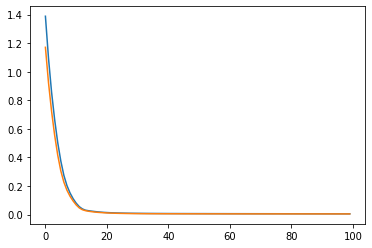

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])